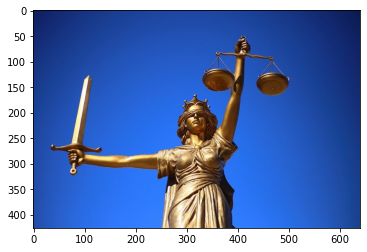

In [33]:
import numpy as np
from PIL import Image # 이미지 처리 모듈, 대표적인 것은 opencv. 이건 pillow
import matplotlib.pyplot as plt

img = Image.open('./images/justice.jpg')

# print(type(img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
plt.imshow(img)
plt.show()

In [34]:
pixel = np.array(img)
# print(pixel); print(pixel.shape) # (426, 640, 3). 세로, 가로, 색상(RGB, 3차원, channel)
# .png 파일은 channel이 4(R, G, B, alpha) 값으로 구성됨. alpha는 투명도

print(pixel[100, 100]) # [ 30  71 161]. [Red, Green, Blue]

[ 30  71 161]


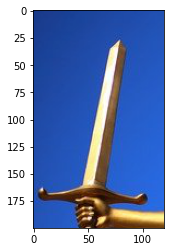

In [35]:
# Pillow를 이용한 이미지 처리
# cropping(이미지 잘라내기). crop(좌상, 우하) 튜플로 입력

crop_img = img.crop((30, 100, 150, 300))
plt.imshow(crop_img)
plt.show()

(640, 426)


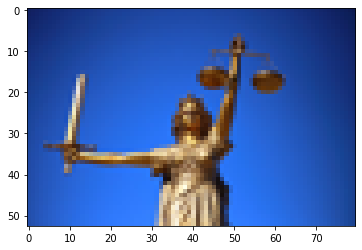

(80, 53)


In [38]:
# Pillow를 이용한 이미지 처리
# Image Resize

print(img.size) # (640, 426). (가로 픽셀수, 세로 픽셀수)

# int(img.size[0] / 8) # 가로 픽셀수/ 8
# int(img.size[1] / 8) # 세로 픽셀수/ 8

resize_img = img.resize((int(img.size[0] / 8), int(img.size[1] / 8)))
plt.imshow(resize_img)
plt.show()

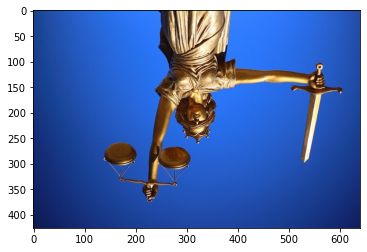

In [18]:
# Pillow를 이용한 이미지 처리
# Image Rotate

rotate_img = img.rotate(180)
plt.imshow(rotate_img)
plt.show()

rotate_img.save('./images/rotate_justice.jpg') # Image 저장

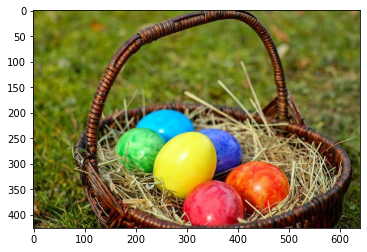

In [42]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./images/fruits.jpg')

plt.imshow(img)
plt.show()

(426, 640, 3)


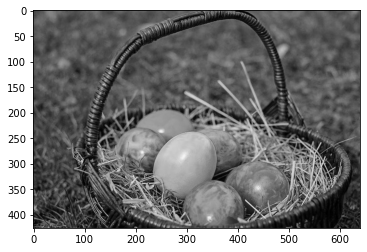

In [43]:
############# 여기부터 보충!!!!!!!!!!!!!!!!!!!!!!!

# pixel data 추출
# color_pixel = np.array(color_img)
color_pixel = np.array(img)

gray_pixel = color_pixel.copy()
print(gray_pixel.shape)

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x])) # broadcasting
        
plt.imshow(gray_pixel)
plt.show()

(426, 640)


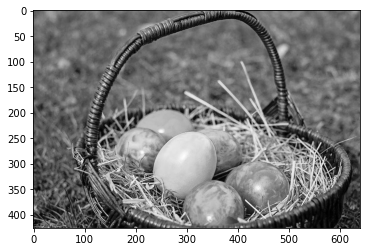

In [44]:
# 흑백 이미지를 2차원으로 표현

gray_2d_pixel = gray_pixel[:,:,0]

print(gray_2d_pixel.shape)

# plt.imshow(gray_2d_pixel, cmap='Greys')
plt.imshow(gray_2d_pixel, cmap='Greys_r')
plt.show()

In [40]:
import numpy as np
import tensorflow as tf

# 입력 이미지의 형태 : (이미지 개수, height, width, channel)
image = np.array([[[[9], [8], [7]],
                   [[6], [5], [4]],
                   [[3], [2], [1]]]], dtype=np.float64)
# print(image.shape) # (1, 3, 3, 1)

# filter의 형태 : (filter height, filter width, filter channel, filter 개수)
# 이미지의 channel 수 = filter의 channel 수
weight = np.array([[[[2]],
                   [[2]]],
                   [[[2]],
                    [[2]]]])
# print(weight.shape) # (2, 2, 1, 1)

# stride : 1
# padding : 'VALID'(no padding) or 'SAME'(convolution. 결과가 이미지의 크기와 같음)

con2d = tf.nn.conv2d(image, # Activation Map을 만들어 내는 함수
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

# 결과 : (이미지 개수, height, width, channel)
                   
sess = tf.Session()
result = sess.run(con2d)
print(result)

[[[[56.]
   [48.]]

  [[32.]
   [24.]]]]
